In [1]:
import sys
print(sys.version)
print(sys.path)
import os

3.7.1 | packaged by conda-forge | (default, Mar 13 2019, 13:32:59) [MSC v.1900 64 bit (AMD64)]
['D:\\michele\\jennifer', 'D:\\michele\\miniconda3\\envs\\prediction\\python37.zip', 'D:\\michele\\miniconda3\\envs\\prediction\\DLLs', 'D:\\michele\\miniconda3\\envs\\prediction\\lib', 'D:\\michele\\miniconda3\\envs\\prediction', '', 'D:\\michele\\miniconda3\\envs\\prediction\\lib\\site-packages', 'D:\\michele\\miniconda3\\envs\\prediction\\lib\\site-packages\\xgboost-0.83.dev0-py3.7.egg', 'D:\\michele\\miniconda3\\envs\\prediction\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\mtinti\\.ipython']


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msn
from scipy import stats
from scipy.spatial import distance
import re
from sklearn import cluster
from sklearn.metrics import  silhouette_score
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multitest as smm
from sklearn.decomposition import PCA
import seaborn as sns
from statsmodels.sandbox.stats.multicomp import multipletests
plt.style.use('ggplot')
from scipy.stats import ttest_ind
#from plotly.widgets import GraphWidget
from adjustText import adjust_text
import warnings
warnings.filterwarnings("ignore")

from ipywidgets import widgets
from IPython.display import display
from plotly.widgets import GraphWidget
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<IPython.core.display.Javascript object>

In [42]:
path = 'D:/michele/jennifer/indata/Hippocampus/combined_ipi/txt/'
df = pd.read_table(path+'proteinGroups.txt')
df.head()
print(df.shape)
df = df[df['Only identified by site']!='+']
df = df[df['Potential contaminant']!='+']
df = df[df['Reverse']!='+']
hippo_cols = ['Reporter intensity corrected {} Hippocampus'.format(n) for n in range(1,11)]
hippo_df=df[hippo_cols+['Protein IDs']]
hippo_df.columns = ['ND_1','ND_2','ND_3','HF_1','HF_2','HF_3','KO_1','KO_2','KO_3','null', 'Fasta headers']
del hippo_df['null']
hippo_df['Protein IDs']=[n.split(';')[0].split(' ')[0].split('|')[2] for n in df['Fasta headers']]
del hippo_df['Fasta headers']
hippo_df.head()
hippo_df=hippo_df.replace(0,np.nan)
#print(hippo_df.shape)
hippo_df = hippo_df.dropna()
#print(hippo_df.shape)
#hippo_df=hippo_df.fillna(hippo_df.mean())
hippo_df.to_csv('Hippocampus_export.csv',sep='\t',index=False)

(7397, 124)


In [45]:
hippo_df.head()
hippo_df[hippo_df['Protein IDs'].isin(['E41L1_MOUSE'])]

,ND_1,ND_2,ND_3,HF_1,HF_2,HF_3,KO_1,KO_2,KO_3,Protein IDs
6472,77776.0,69278.0,74622.0,85246.0,82539.0,83851.0,456450.0,496570.0,485760.0,E41L1_MOUSE


In [30]:
#+['Protein IDs']
#hippo_df['isna']=hippo_df.isnull().sum(axis=1)
#hippo_df[hippo_df['isna']>0]

,ND_1,ND_2,ND_3,HF_1,HF_2,HF_3,KO_1,KO_2,KO_3,isna
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
436,939.47,1041.60,713.29,1299.50,1032.70,NaN,1104.50,772.84,741.34,1
1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [10]:
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Phospho (STY) site IDs,Oxidation (M) site positions,Phospho (STY) site positions,unique
153,tr|E9PXY1|E9PXY1_MOUSE;sp|A2A432|CUL4B_MOUSE;t...,tr|E9PXY1|E9PXY1_MOUSE;sp|A2A432|CUL4B_MOUSE;t...,32;32;18,32;32;18,19;19;13,tr|E9PXY1|E9PXY1_MOUSE Cullin-4B OS=Mus muscul...,3,32,32,19,...,True;True;True;True;True;True;True;True;True;T...,2115;2581;9620;9788;10018;12533;13302;13637;13...,4691;4692;5742;20286;20590;21048;26239;26240;2...,5114;5115;6344;22409;22754;23254;28989;28990;2...,5115;6344;22409;22754;23254;28989;31006;31968;...,NaN,NaN,NaN,NaN,19
154,sp|A2A5R2|BIG2_MOUSE;tr|F6YCJ0|F6YCJ0_MOUSE,sp|A2A5R2|BIG2_MOUSE,38;4,38;4,23;1,sp|A2A5R2|BIG2_MOUSE Brefeldin A-inhibited gua...,2,38,38,23,...,True;True;True;True;True;True;True;True;True;T...,943;3801;4463;6107;7532;7669;8151;9140;10650;1...,2199;8166;9570;12867;12868;16137;16374;17246;1...,2417;9020;10671;14198;14199;17931;18179;19086;...,2417;9020;10671;14199;17931;18179;19086;21230;...,NaN,NaN,NaN,NaN,23
155,sp|A2A690|TANC2_MOUSE;tr|F6VP19|F6VP19_MOUSE;t...,sp|A2A690|TANC2_MOUSE,25;9;5;1;1,25;9;5;1;1,24;9;5;1;1,sp|A2A690|TANC2_MOUSE Protein TANC2 OS=Mus mus...,5,25,25,24,...,True;True;True;True;True;True;True;True;True;T...,11906;16537;22306;23911;25475;28520;40205;4187...,24922;34783;34784;46188;46189;49642;52907;5924...,27550;38384;38385;50984;50985;54859;58418;6532...,27550;38384;50985;54859;58418;65323;91513;9485...,NaN,1930,NaN,318,24
156,sp|A2A699|F1712_MOUSE,sp|A2A699|F1712_MOUSE,12,12,11,sp|A2A699|F1712_MOUSE Protein FAM171A2 OS=Mus ...,1,12,12,11,...,True;True;True;True;True;True;True;True;True;T...,3279;5144;7011;37774;43601;44054;51917;52428;5...,7275;7276;10900;10901;14960;78219;88971;89736;...,8056;8057;12094;12095;16599;86189;98094;98897;...,8057;12094;16599;86189;98094;98898;117428;1186...,NaN,NaN,NaN,NaN,11
157,sp|A2A6Q5|CDC27_MOUSE;tr|Q8R568|Q8R568_MOUSE,sp|A2A6Q5|CDC27_MOUSE;tr|Q8R568|Q8R568_MOUSE,6;4,6;4,6;4,sp|A2A6Q5|CDC27_MOUSE Cell division cycle prot...,2,6,6,6,...,True;True;True;True;True;True,8374;15341;37522;38760;40054;42959,17751;32286;77718;80340;82724;87857,19642;35635;85646;88648;91232;96904,19642;35635;85646;88648;91232;96904,NaN,NaN,NaN,NaN,6


(7397, 124)


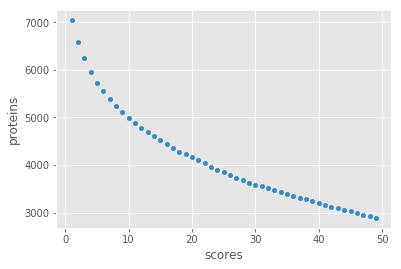

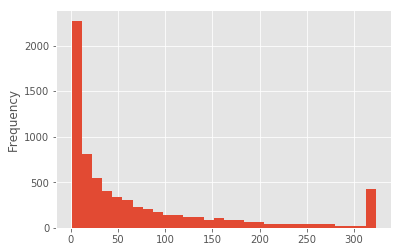

In [3]:
path = 'D:/michele/jennifer/indata/Hippocampus/combined_ipi/txt/'
df = pd.read_table(path+'proteinGroups.txt')
df.head()
print(df.shape)
df = df[df['Only identified by site']!='+']
df = df[df['Potential contaminant']!='+']
df = df[df['Reverse']!='+']

scores = []
proteins = []
for n in range(1,50):
    scores.append(n)
    proteins.append(df[df['Score']>n].shape[0])
score_t = pd.DataFrame() 
score_t['scores']=scores
score_t['proteins']=proteins
score_t.plot(x='scores',y='proteins',kind='scatter')
plt.show()
df['Score'].plot(kind='hist',bins=30)

In [4]:
df=df[df['Score']>2]
df['unique']=[ n.split(';')[0] for n in df['Peptide counts (unique)'] ]
df['unique'] = df['unique'].astype(int)
df = df[df['unique']>=2]
print(df.shape)
df.head().columns[0:30]

(5869, 125)


Index(['Protein IDs', 'Majority protein IDs', 'Peptide counts (all)',
       'Peptide counts (razor+unique)', 'Peptide counts (unique)',
       'Fasta headers', 'Number of proteins', 'Peptides',
       'Razor + unique peptides', 'Unique peptides', 'Peptides Hippocampus',
       'Razor + unique peptides Hippocampus', 'Unique peptides Hippocampus',
       'Sequence coverage [%]', 'Unique + razor sequence coverage [%]',
       'Unique sequence coverage [%]', 'Mol. weight [kDa]', 'Sequence length',
       'Sequence lengths', 'Fraction average', 'Fraction 1', 'Fraction 2',
       'Fraction 3', 'Fraction 4', 'Fraction 5', 'Fraction 6', 'Fraction 7',
       'Fraction 8', 'Fraction 9', 'Fraction 10'],
      dtype='object')

In [5]:
hippo_cols = ['Reporter intensity corrected {} Hippocampus'.format(n) for n in range(1,11)]
hippo_df=df[hippo_cols]
hippo_df.head(10)

,Reporter intensity corrected 1 Hippocampus,Reporter intensity corrected 2 Hippocampus,Reporter intensity corrected 3 Hippocampus,Reporter intensity corrected 4 Hippocampus,Reporter intensity corrected 5 Hippocampus,Reporter intensity corrected 6 Hippocampus,Reporter intensity corrected 7 Hippocampus,Reporter intensity corrected 8 Hippocampus,Reporter intensity corrected 9 Hippocampus,Reporter intensity corrected 10 Hippocampus
153,1458800.0,1533800.0,1416400.0,1378000.0,1522300.0,1216900.0,1085100.0,1490200.0,1312600.0,615700.0
154,1276900.0,1345800.0,1226700.0,1125400.0,1316500.0,1008900.0,851180.0,1273000.0,1083300.0,595140.0
155,751950.0,790170.0,693740.0,671740.0,732560.0,575820.0,485000.0,751780.0,636580.0,388980.0
156,280690.0,279700.0,300880.0,335690.0,305910.0,253170.0,280620.0,288580.0,291180.0,240900.0
157,121100.0,127130.0,122370.0,117650.0,135190.0,107810.0,90850.0,119820.0,127840.0,73783.0
158,28097.0,26474.0,25467.0,33467.0,28754.0,24803.0,26648.0,25757.0,26264.0,19206.0
159,30260.0,28491.0,29799.0,27480.0,31239.0,27989.0,20987.0,33614.0,31501.0,16631.0
160,188140.0,174330.0,178330.0,198830.0,191110.0,172250.0,154890.0,178560.0,182320.0,179880.0
161,91349.0,94598.0,79415.0,81370.0,93421.0,73751.0,56409.0,91731.0,83483.0,45895.0
162,95648.0,96697.0,94541.0,86765.0,91773.0,77957.0,60932.0,92200.0,87971.0,47271.0


In [6]:
hippo_df = hippo_df.replace(0, np.nan)
hippo_df.dropna(how='all', axis=0,inplace=True)
hippo_df.shape

(5869, 10)

In [7]:
hippo_df.columns = ['ND_1','ND_2','ND_3','HF_1','HF_2','HF_3','KO_1','KO_2','KO_3','null']
del hippo_df['null']
#hippo_df.head(10)

In [9]:
#hippo_df.join(df[['Protein IDs']],how='left').to_csv('Hippocampus_export.csv',sep='\t',index=False)

In [506]:
#np.log2(hippo_df).describe()

In [507]:
#np.log2(hippo_df).plot(kind='box')

In [508]:
#np.log2(hippo_df).plot(kind='kde')

In [509]:
col_sum = hippo_df.sum(axis=0)
target = np.mean(col_sum)
norm_facs = target / col_sum
norm_facs

ND_1    0.941573
ND_2    0.940517
ND_3    0.974647
HF_1    0.926969
HF_2    0.903332
HF_3    1.135043
KO_1    1.179257
KO_2    1.000501
KO_3    1.070229
dtype: float64

## Values Distributions

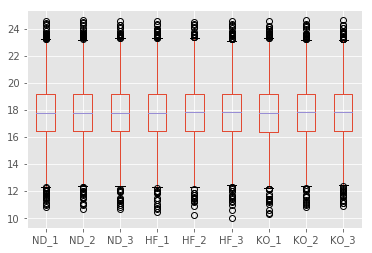

In [510]:
hippo_df = hippo_df.multiply(norm_facs,axis=1)
np.log2(hippo_df).plot(kind='box')


In [511]:
def make_pca(in_df):
    cols = in_df.columns
    pca = PCA(n_components=2)
    pca.fit(in_df)
    temp_df = pd.DataFrame()
    temp_df['pc_1']=pca.components_[0]
    temp_df['pc_2']=pca.components_[1]
    temp_df.index = cols
    print(pca.explained_variance_ratio_)
    fig,ax=plt.subplots()
    temp_df.iloc[0:3,:].plot(kind='scatter',x='pc_1',y='pc_2',s=50, c='g', ax=ax,legend ='ND')
    temp_df.iloc[3:6,:].plot(kind='scatter',x='pc_1',y='pc_2',s=50, c='b', ax=ax, legend='HF')    
    temp_df.iloc[6:9,:].plot(kind='scatter',x='pc_1',y='pc_2',s=50, c='r', ax=ax, legend='KO')
    for i, txt in enumerate(cols):
        ax.annotate(txt, (temp_df['pc_1'].values[i]+0.0003,temp_df['pc_2'].values[i]))
    #ax.set_xlabel('PC1({})'.format(round(pca.explained_variance_ratio_[0],2)))
    #ax.set_ylabel('PC2({})'.format(round(pca.explained_variance_ratio_[1],2)))
    #ax.set_xlim(0.345,0.360)
    ax.set_xlabel('PC1_{:.3f}'.format(pca.explained_variance_ratio_[0]))
    ax.set_ylabel('PC2_{:.3f}'.format(pca.explained_variance_ratio_[1]))
    
    ax.yaxis.label.set_size(12)
    ax.xaxis.label.set_size(12)
    #plt.tick_params(axis='both', which='major', labelsize=16, rotation=70, horizontalalignment='right' )
    #plt.setp( axs[1].xaxis.get_majorticklabels(), )
    if not os.path.exists(path+'figs'):  
        os.makedirs(path+'figs')
    fig.savefig(path+'figs/pca.svg')
    fig.savefig(path+'figs/pca.png')
    fig.savefig(path+'figs/pca.pdf')
    plt.legend()
    plt.show()

## PCA plot

[0.99579595 0.00220301]


No handles with labels found to put in legend.


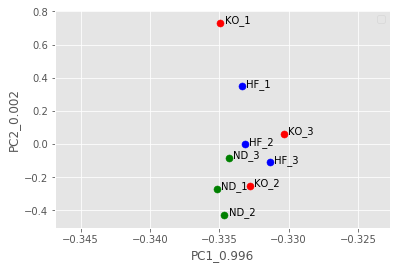

In [512]:
hippo_df=hippo_df.fillna(0)
make_pca(np.log2(hippo_df))

In [530]:
#pd.Series(multipletests(hippo_df['HF_KO_pvalue'],method='fdr_bh',alpha=0.1)[0]).value_counts()

False    5868
True        1
dtype: int64

In [513]:
onesample_results = ttest_ind(hippo_df[['ND_1','ND_2','ND_3']].T, 
                              hippo_df[['KO_1','KO_2','KO_3']].T)
#print(onesample_results)
hippo_df['ND_KO_pvalue']=onesample_results.pvalue
hippo_df['ND_KO_pvalue_corr']=multipletests(onesample_results.pvalue,method='bonferroni')[1]

onesample_results = ttest_ind(hippo_df[['HF_1','HF_2','HF_3']].T, 
                              hippo_df[['KO_1','KO_2','KO_3']].T)
#print(onesample_results)
hippo_df['HF_KO_pvalue']=onesample_results.pvalue
hippo_df['HF_KO_pvalue_corr']=multipletests(onesample_results.pvalue,method='bonferroni')[1]

onesample_results = ttest_ind(hippo_df[['HF_1','HF_2','HF_3']].T, 
                              hippo_df[['ND_1','ND_2','ND_3']].T)
#print(onesample_results)
hippo_df['HF_ND_pvalue']=onesample_results.pvalue
hippo_df['HF_ND_pvalue_corr']=multipletests(onesample_results.pvalue,method='bonferroni')[1]


hippo_df['log10_ND_KO_pvalue']=-np.log10(hippo_df['ND_KO_pvalue'])
hippo_df['log10_HF_KO_pvalue']=-np.log10(hippo_df['HF_KO_pvalue'])
hippo_df['log10_HF_ND_pvalue']=-np.log10(hippo_df['HF_ND_pvalue'])
hippo_df.head()

,ND_1,ND_2,ND_3,HF_1,HF_2,HF_3,KO_1,KO_2,KO_3,ND_KO_pvalue,ND_KO_pvalue_corr,HF_KO_pvalue,HF_KO_pvalue_corr,HF_ND_pvalue,HF_ND_pvalue_corr,log10_ND_KO_pvalue,log10_HF_KO_pvalue,log10_HF_ND_pvalue
153,1.373567e+06,1.442565e+06,1.380491e+06,1.277363e+06,1.375143e+06,1.381234e+06,1.279612e+06,1.490947e+06,1.404783e+06,0.918547,1.0,0.536959,1.0,0.247903,1.0,0.036899,0.270059,0.605719
154,1.202295e+06,1.265748e+06,1.195600e+06,1.043211e+06,1.189237e+06,1.145145e+06,1.003760e+06,1.273638e+06,1.159380e+06,0.405165,1.0,0.836099,1.0,0.121718,1.0,0.392368,0.077743,0.914646
155,7.080162e+05,7.431682e+05,6.761519e+05,6.226821e+05,6.617452e+05,6.535805e+05,5.719396e+05,7.521568e+05,6.812866e+05,0.507209,1.0,0.697530,1.0,0.049919,1.0,0.294813,0.156437,1.301730
156,2.642903e+05,2.630626e+05,2.932519e+05,3.111742e+05,2.763384e+05,2.873589e+05,3.309231e+05,2.887246e+05,3.116294e+05,0.078367,1.0,0.303831,1.0,0.273058,1.0,1.105868,0.517368,0.563746
157,1.140245e+05,1.195679e+05,1.192676e+05,1.090579e+05,1.221215e+05,1.223690e+05,1.071355e+05,1.198800e+05,1.368181e+05,0.698458,1.0,0.740477,1.0,0.963794,1.0,0.155860,0.130488,0.016016


In [514]:
#df.loc[i]['Fasta headers']

In [515]:
#for visualization later
hippo_df['mean_ND'] = hippo_df[['ND_1','ND_2','ND_3']].median(axis=1)
hippo_df['mean_HF'] = hippo_df[['HF_1','HF_2','HF_3']].median(axis=1)
hippo_df['mean_KO'] = hippo_df[['KO_1','KO_2','KO_3']].median(axis=1)

hippo_df['log2_fc_HF_ND'] = np.log2(hippo_df['mean_HF']/hippo_df['mean_ND'])
hippo_df['log2_fc_ND_KO'] = np.log2(hippo_df['mean_ND']/hippo_df['mean_KO'])
hippo_df['log2_fc_HF_KO'] = np.log2(hippo_df['mean_HF']/hippo_df['mean_KO'])
#hippo_df['desc']=[df.loc[i]['Fasta headers'].split('|')[2].split(';')[0].split(' ')[0] for i in hippo_df.index.values]
#hippo_df.to_csv('Hippocampus_table.csv')

## p-values distridibutions

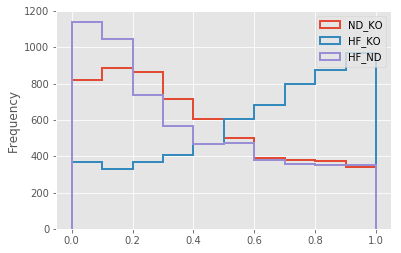

In [516]:
hippo_df['ND_KO_pvalue'].plot(kind='hist',bins=10,histtype='step',label='ND_KO',linewidth=2)
hippo_df['HF_KO_pvalue'].plot(kind='hist',bins=10,histtype='step',label='HF_KO',linewidth=2)
hippo_df['HF_ND_pvalue'].plot(kind='hist',bins=10,histtype='step',label='HF_ND',linewidth=2)
plt.legend()
plt.show()

bace_index 1363


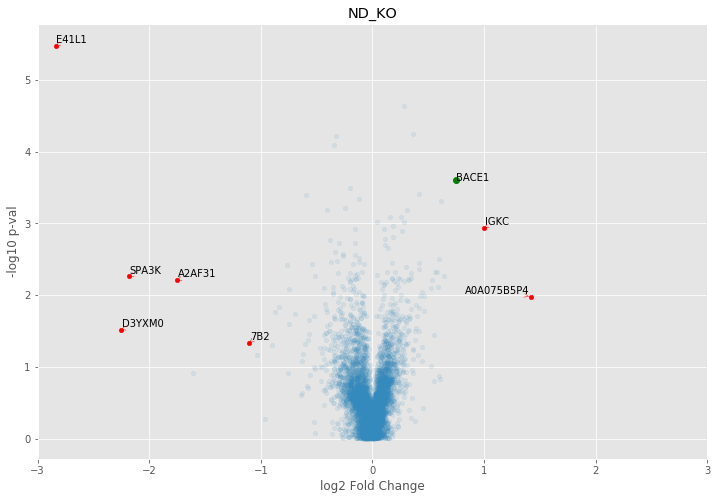

693     sp|P01837|IGKC_MOUSE Immunoglobulin kappa cons...
694     tr|A0A075B5P4|A0A075B5P4_MOUSE Ig gamma-1 chai...
744     sp|P07759|SPA3K_MOUSE Serine protease inhibito...
827     sp|P12961|7B2_MOUSE Neuroendocrine protein 7B2...
6472    sp|Q9Z2H5|E41L1_MOUSE Band 4.1-like protein 1 ...
6758    tr|A2AF31|A2AF31_MOUSE Thymosin beta OS=Mus mu...
6872    tr|D3YXM0|D3YXM0_MOUSE Signal-regulatory prote...
Name: Fasta headers, dtype: object


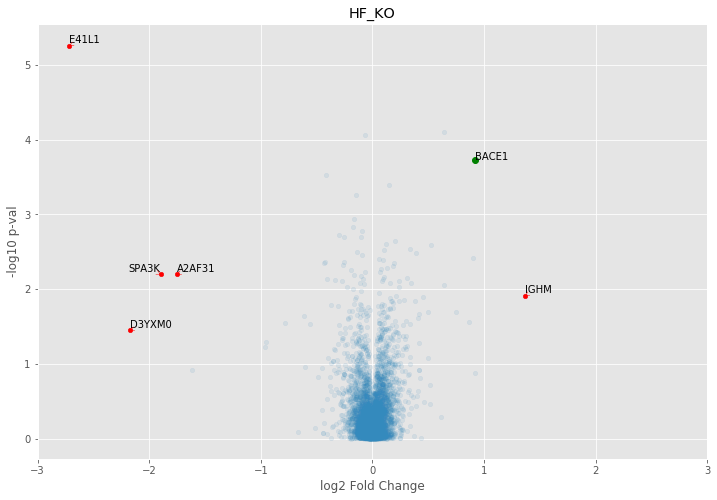

695     sp|P01872|IGHM_MOUSE Immunoglobulin heavy cons...
744     sp|P07759|SPA3K_MOUSE Serine protease inhibito...
6472    sp|Q9Z2H5|E41L1_MOUSE Band 4.1-like protein 1 ...
6758    tr|A2AF31|A2AF31_MOUSE Thymosin beta OS=Mus mu...
6872    tr|D3YXM0|D3YXM0_MOUSE Signal-regulatory prote...
Name: Fasta headers, dtype: object


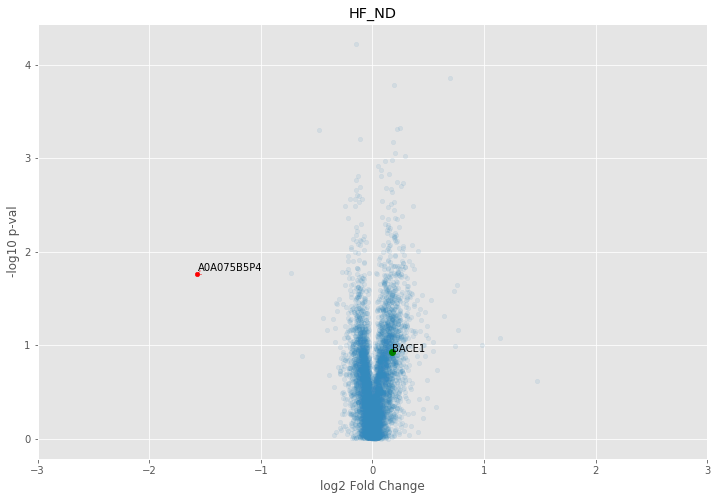

694    tr|A0A075B5P4|A0A075B5P4_MOUSE Ig gamma-1 chai...
Name: Fasta headers, dtype: object


In [517]:
def find_sprot(index, series, sprot_id):
    for index,n in zip(index, series):
        if sprot_id in n:
            return index
    return -1

bace_index = find_sprot(df.index.values, df['Fasta headers'],'P56818')
print('bace_index', bace_index)
tag = 'ND_KO'


def make_fig(indf=pd.DataFrame(), 
             bace_index=int, 
             tag='', 
             fasta=pd.Series(),
             path_figure='../'):

    fig, ax=plt.subplots(figsize=(12,8))
    indf.plot(kind='scatter',
             x='log2_fc_{}'.format(tag),
             y='log10_{}_pvalue'.format(tag), 
             ax=ax, alpha=0.1)

    selection = indf[(indf['{}_pvalue'.format(tag)]<0.05) & 
         ((indf['log2_fc_{}'.format(tag)]<-1) | (indf['log2_fc_{}'.format(tag)]>1))]
    
    if  selection.shape[0]>0:
        selection.plot(kind='scatter',
             x='log2_fc_{}'.format(tag),
             y='log10_{}_pvalue'.format(tag), 
             ax=ax, c='r')
        texts = [plt.text(selection.loc[i]['log2_fc_{}'.format(tag)], 
                  selection.loc[i]['log10_{}_pvalue'.format(tag)], 
                  fasta.loc[i].split('|')[2].split(';')[0].split(' ')[0].split('_')[0]) for i in selection.index.values]
        adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
        

    if bace_index != -1:

        ax.plot(hippo_df.loc[bace_index]['log2_fc_{}'.format(tag)],
            hippo_df.loc[bace_index]['log10_{}_pvalue'.format(tag)],marker='o', c='g')

        plt.text(hippo_df.loc[bace_index]['log2_fc_{}'.format(tag)],
             hippo_df.loc[bace_index]['log10_{}_pvalue'.format(tag)],
            'BACE1')

    plt.xlabel('log2 Fold Change')
    plt.ylabel('-log10 p-val')
    plt.title(tag)
    plt.xlim(-3,3)
    

    fig.savefig('{}vulcano_{}.svg'.format(path_figure,tag))
    fig.savefig('{}vulcano_{}.png'.format(path_figure,tag))
    fig.savefig('{}vulcano_{}.pdf'.format(path_figure,tag))
    plt.show()
    genes = df.loc[selection.index.values]['Fasta headers']
    print(genes)
    

make_fig(hippo_df,  bace_index, 'ND_KO',  df['Fasta headers'], path+'figs/')
make_fig(hippo_df,  bace_index, 'HF_KO',  df['Fasta headers'], path+'figs/')
make_fig(hippo_df,  bace_index, 'HF_ND',  df['Fasta headers'], path+'figs/')

In [518]:
print(df.loc[hippo_df[hippo_df['ND_KO_pvalue_corr']<0.05].index.values]['Fasta headers'])
print(df.loc[hippo_df[hippo_df['HF_KO_pvalue_corr']<0.05].index.values]['Fasta headers'])

6472    sp|Q9Z2H5|E41L1_MOUSE Band 4.1-like protein 1 ...
Name: Fasta headers, dtype: object
6472    sp|Q9Z2H5|E41L1_MOUSE Band 4.1-like protein 1 ...
Name: Fasta headers, dtype: object


In [450]:

#interactive plot
trace_1 = go.Scatter(
    x=hippo_df['log2_fc_{}'.format(tag)],
    y=hippo_df['log10_{}_pvalue'.format(tag)],
    mode='markers',
    name='MA Plot',
    text = [df.loc[i]['Fasta headers'].split('|')[2].split(';')[0].split(' ')[0] for i in hippo_df.index.values],
    hoverinfo = 'text',
    marker=dict(
        #size=16,
        color = hippo_df['log10_{}_pvalue'.format(tag)], #set color equal to a variable
        colorscale='Bluered',
        showscale=True
    )
)

data = [trace_1]
if bace_index != -1:
    annot_1 = go.Scatter(
    x=[hippo_df.loc[bace_index]['log2_fc_{}'.format(tag)]],
    y=[hippo_df.loc[bace_index]['log10_{}_pvalue'.format(tag)]],
    mode='markers+text',
    name='BACE1',
    text=['BACE1'],
    textposition='bottom center')
    data.append(annot_1)

layout = dict(title=tag,
             width=800,
             height=800,
              
             )

fig = go.Figure(data=data, 
                layout=layout)
iplot(fig, filename='test')

In [451]:
#significant after
#bonferroni correction
#df.loc[hippo_df[hippo_df['ND_KO_pvalue_corr']<0.05].index.values]

In [452]:
#interactive plot
trace_1 = go.Scatter(
    x=hippo_df['log2_fc_{}'.format(tag)],
    y=hippo_df['log10_{}_pvalue'.format(tag)],
    mode='markers',
    name='MA Plot',
    text = [df.loc[i]['Fasta headers'].split('|')[2].split(';')[0].split(' ')[0] for i in hippo_df.index.values],
    hoverinfo = 'text',
    marker=dict(
        #size=16,
        color = hippo_df['log10_{}_pvalue'.format(tag)], #set color equal to a variable
        colorscale='Bluered',
        showscale=True
    )
)

data = [trace_1]
if bace_index != -1:
    annot_1 = go.Scatter(
    x=[hippo_df.loc[bace_index]['log2_fc_{}'.format(tag)]],
    y=[hippo_df.loc[bace_index]['log10_{}_pvalue'.format(tag)]],
    mode='markers+text',
    name='BACE1',
    text=['BACE1'],
    textposition='bottom center'
    )
    data.append(annot_1)

layout = dict(title=tag,
             width=800,
             height=800,
              
             )
             

fig = go.Figure(data=data, 
                layout=layout)
iplot(fig, filename='test')

In [453]:
#significant
#bonferroni correction
#df.loc[hippo_df[hippo_df['HF_KO_pvalue_corr']<0.05].index.values]

In [67]:
#significant after
#bonferroni correction
df.loc[hippo_df[hippo_df['HF_ND_pvalue_corr']<0.05].index.values]

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Phospho (STY) site IDs,Oxidation (M) site positions,Phospho (STY) site positions,unique


In [456]:
hippo_df = hippo_df.join(df['Protein IDs'],how='left')
hippo_df.to_csv(path+'Hippocampus.csv')

In [457]:
def find_prot(inlist, prot='Q3UGC7'):
    out = []
    for p,n in enumerate(inlist):
        if prot in n:
            out.append(p)
    return out

In [469]:
cols = ['Reporter intensity corrected {}'.format(n) for n in range(1,10)]
df = pd.read_table(path+'peptides.txt')
df = df[df['Reverse']!='+']
df = df[df['Potential contaminant']!='+']

count    7.323300e+04
mean     7.414334e-03
std      3.499331e-02
min      0.000000e+00
25%      1.296700e-09
50%      1.181300e-04
75%      4.476700e-03
max      1.000000e+00
Name: PEP, dtype: float64

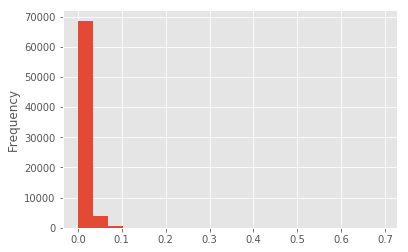

In [470]:
np.log1p(df['PEP']).plot(kind='hist',bins=20)
df['PEP'].describe()

In [471]:
df['Score'].describe()

count    73157.000000
mean       144.364796
std         59.927075
min         30.889000
25%        103.210000
50%        133.130000
75%        172.750000
max        574.690000
Name: Score, dtype: float64

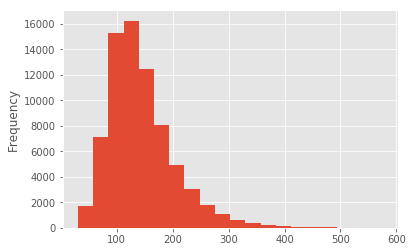

In [472]:
df['Score'].plot(kind='hist',bins=20)

In [473]:
df = df[df['PEP']<4.725200e-05]
df = df[df['Score']>100]
#df['Localization prob'].plot(kind='hist')
#plt.show()
#df['Delta score'].plot(kind='hist')
#df = df[df['Localization prob']>0.75]
#df = df[df['Localization prob']>0.75]
print(df.shape)
df.head()

(32391, 143)


,Sequence,N-term cleavage window,C-term cleavage window,Amino acid before,First amino acid,Second amino acid,Second last amino acid,Last amino acid,Amino acid after,A Count,...,Potential contaminant,id,Protein group IDs,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Phospho (STY) site IDs,MS/MS Count
0,AAAAAAAAAAAAAAAGAAGK,QSRFQVDPVSENAGRAAAAAAAAAAAAAAA,AAAAAAAAAAGAAGKETPAAGKAGGESGVA,R,A,A,G,K,E,17,...,NaN,0,7061,0,0;1,0;1,1.0,NaN,NaN,2
1,AAAAAAAAAAGAAGGR,______________________________,AAAAAAAAAGAAGGRGSGPGRRRHLVPGAG,M,A,A,G,R,G,12,...,NaN,1,3925,1,2;3,2;3,3.0,NaN,NaN,2
2,AAAAAAAAAAGDSDSWDADTFSMEDPVR,______________________________,DSWDADTFSMEDPVRKVAGGGTAGGDRWEG,M,A,A,V,R,K,11,...,NaN,2,2101,2,4;5,4;5,4.0,NaN,NaN,2
5,AAAAAAGAASGLPGPVAQGLK,______________________________,GAASGLPGPVAQGLKEALVDTLTGILSPVQ,M,A,A,L,K,E,9,...,NaN,5,4680,5,8;9,8;9,8.0,NaN,NaN,2
6,AAAAAAGPEMVR,______________________________,______________________________,M,A,A,V,R,G,6,...,NaN,6,1603,6,10;11;12;13,10;11;12;13;14,10.0,NaN,NaN,5


In [474]:
temp = df[cols]
print(temp.shape)
temp.replace(0,np.nan,inplace=True)
temp.dropna(how='all', axis=0,inplace=True)
print(temp.shape)

(32391, 9)
(31675, 9)


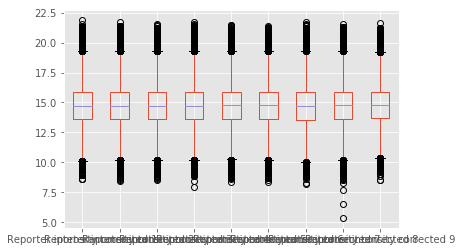

In [475]:
col_sum = temp.sum(axis=0)
target = np.mean(col_sum)
norm_facs = target / col_sum
temp = temp.multiply(norm_facs,axis=1)
np.log2(temp).plot(kind='box')
#temp = np.log2(temp)
#temp = np.log2(temp.dropna())

In [476]:
#make_pca(np.log2(temp.dropna()))

In [477]:
onesample_results = ttest_ind(temp[[cols[0],cols[1],cols[2]]].T, 
                              temp[[cols[6],cols[7],cols[8]]].T)
#print(onesample_results)
temp['ND_KO_pvalue']=onesample_results.pvalue
temp['ND_KO_pvalue_corr']=multipletests(onesample_results.pvalue,method='s')[1]
temp['log10_ND_KO_pvalue']=-np.log10(temp['ND_KO_pvalue'])
temp['ND_KO_fc']=np.log2(temp[[cols[0],cols[1],cols[2]]].mean(axis=1)/temp[[cols[6],cols[7],cols[8]]].mean(axis=1))

In [478]:
temp = temp.join(df['PEP'],how='left')
temp = temp.join(df['Proteins'],how='left')
temp = temp.join(df['Sequence'],how='left')
#temp.sort_values('ND_KO_pvalue').head(20)

In [479]:
temp[(temp['ND_KO_fc']>2)|(temp['ND_KO_fc']<-2)].sort_values('ND_KO_pvalue').head(10)

,Reporter intensity corrected 1,Reporter intensity corrected 2,Reporter intensity corrected 3,Reporter intensity corrected 4,Reporter intensity corrected 5,Reporter intensity corrected 6,Reporter intensity corrected 7,Reporter intensity corrected 8,Reporter intensity corrected 9,ND_KO_pvalue,ND_KO_pvalue_corr,log10_ND_KO_pvalue,ND_KO_fc,PEP,Proteins,Sequence
4454,167410.635207,161859.784179,158837.693660,167496.785514,157938.678802,170625.511126,20914.581657,17640.347853,20652.319659,7.857537e-07,0.024582,6.104714,3.043355,0.000000e+00,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE,APESDTGDEDQDQER
55975,10415.596853,9646.400939,9987.952836,10216.364269,10893.728419,12619.412473,58699.755994,60121.963092,53555.781631,1.898095e-05,0.451861,4.721682,-2.520137,1.265800e-13,sp|Q9Z2H5|E41L1_MOUSE,SDSETEGLVFAQDLK
4453,45077.876321,42169.886894,50393.137556,55007.153008,49010.453844,61017.606079,290249.672465,276175.617598,315083.933768,2.857953e-05,0.595567,4.543945,-2.679066,4.446100e-174,sp|Q9Z2H5|E41L1_MOUSE,APESDMGDEDQDQER
55976,89308.222794,91574.097986,105787.120824,98884.088423,98564.461705,91601.678471,14968.302153,15849.642995,22794.253875,1.701606e-04,0.995439,3.769141,2.418755,1.502100e-51,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE,SDSETEGLVFAR
63939,108431.202239,92972.168543,92515.645666,218689.153631,183340.769851,106938.651594,14350.323085,20571.047908,25133.513383,2.151178e-04,0.998902,3.667324,2.291065,3.067800e-09,sp|Q00623|APOA1_MOUSE,TQVQSVIDK
26163,8747.785900,7483.537184,10789.697527,8847.426730,11757.073382,10507.264571,301984.198657,232510.893886,263015.518046,2.173602e-04,0.998978,3.662820,-4.883350,4.669200e-15,sp|Q9JKR6|HYOU1_MOUSE,GQAGPEGAAPAPEEDKK
12420,17586.714145,14206.569729,12847.541613,13306.146573,14869.826052,20563.137712,189368.127698,161584.543591,146689.075832,2.765991e-04,0.999844,3.558149,-3.478672,3.004700e-16,sp|Q9Z2H5|E41L1_MOUSE,DYFGLTFCDADSQK
9672,49064.649207,39094.512875,39899.800979,41926.706096,39197.491995,42144.096816,4534.716247,5016.279660,6205.562162,3.189741e-04,0.999959,3.496245,3.022784,1.460200e-12,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE,DKSDSETEGLVFAR
55876,27860.429615,20180.057289,28145.458371,29429.393411,25275.261779,17158.042082,251767.502653,150024.170126,196603.887562,4.137947e-03,1.000000,2.383215,-2.973503,4.970900e-26,tr|A2AF31|A2AF31_MOUSE;tr|Q8C0W0|Q8C0W0_MOUSE;...,SDKPDLSEVETFDK
1898,68561.594150,67730.657452,64307.382326,59771.718923,64260.767707,60371.637756,6047.585614,35171.408567,8340.176247,5.950709e-03,1.000000,2.225431,2.017095,4.812100e-21,sp|Q9CZD3|GARS_MOUSE,AEVSELPNVVR


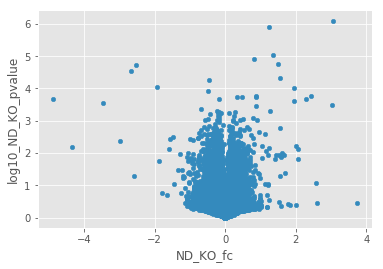

In [480]:
temp.plot(kind='scatter',x='ND_KO_fc',y='log10_ND_KO_pvalue')

In [486]:
temp.iloc[find_prot(temp['Proteins'], prot='A2AUK5')]

,Reporter intensity corrected 1,Reporter intensity corrected 2,Reporter intensity corrected 3,Reporter intensity corrected 4,Reporter intensity corrected 5,Reporter intensity corrected 6,Reporter intensity corrected 7,Reporter intensity corrected 8,Reporter intensity corrected 9,ND_KO_pvalue,ND_KO_pvalue_corr,log10_ND_KO_pvalue,ND_KO_fc,PEP,Proteins,Sequence
1849,89597.623229,81270.117849,88885.714683,93780.512404,84339.653086,90927.624569,97339.958621,98289.242943,92538.135659,4.175090e-02,1.000000,1.379334,-0.149764,2.708800e-30,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,AETMTVSSLAIR
4454,167410.635207,161859.784179,158837.693660,167496.785514,157938.678802,170625.511126,20914.581657,17640.347853,20652.319659,7.857537e-07,0.024582,6.104714,3.043355,0.000000e+00,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE,APESDTGDEDQDQER
8024,3578.699480,3502.228691,3625.809406,6566.938926,3401.742222,3982.759824,5334.668922,3126.013217,4477.162348,3.123775e-01,1.000000,0.505320,-0.273078,1.986100e-07,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,DAVFLKDNHLAIER
8778,21382.745835,24081.693867,25052.313613,24611.396556,27456.725233,22829.082246,26318.360452,23530.824358,22866.394304,6.557387e-01,1.000000,0.183269,-0.044298,9.747700e-21,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,DFMTTPPCITTETISTTMENSLK
9672,49064.649207,39094.512875,39899.800979,41926.706096,39197.491995,42144.096816,4534.716247,5016.279660,6205.562162,3.189741e-04,0.999959,3.496245,3.022784,1.460200e-12,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE,DKSDSETEGLVFAR
12421,232215.661363,303830.180136,267578.610715,268766.841788,308793.036918,234537.055292,79757.038924,83895.424950,113101.340670,1.628397e-03,1.000000,2.788240,1.537918,2.120100e-54,tr|A2AUK5|A2AUK5_MOUSE;tr|A2AUK8|A2AUK8_MOUSE;...,DYFGLTYCDADSQK
12499,21817.786100,35361.559656,37886.116639,42318.225917,44347.666304,24046.872963,64200.241437,28583.098589,26931.719672,5.656961e-01,1.000000,0.247417,-0.332611,1.203500e-29,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,DYSEADGLSER
22480,66524.515758,67480.014946,72167.816814,73728.249010,72994.774833,76836.527742,75540.864940,78982.516886,85028.104793,2.736039e-02,1.000000,1.562878,-0.216485,6.332600e-09,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,FYPPDPAQLTEDITR
22526,93227.343630,107576.144831,108888.116203,109616.337633,108221.604736,104670.460213,116753.228535,111432.775966,108857.786006,1.744555e-01,1.000000,0.758315,-0.122104,3.513300e-10,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,GAAAMIPGPQTVATEIR
22575,29179.644589,25983.908477,28329.947969,28604.898730,32062.439602,29353.924020,31072.317746,27700.780407,23618.564369,8.837364e-01,1.000000,0.053677,0.019166,2.090000e-09,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,GACSTPEMPQFESVK


In [485]:
temp.iloc[find_prot(temp['Proteins'], prot='Q9Z2H5')]

,Reporter intensity corrected 1,Reporter intensity corrected 2,Reporter intensity corrected 3,Reporter intensity corrected 4,Reporter intensity corrected 5,Reporter intensity corrected 6,Reporter intensity corrected 7,Reporter intensity corrected 8,Reporter intensity corrected 9,ND_KO_pvalue,ND_KO_pvalue_corr,log10_ND_KO_pvalue,ND_KO_fc,PEP,Proteins,Sequence
1849,89597.623229,81270.117849,88885.714683,93780.512404,84339.653086,90927.624569,97339.958621,98289.242943,92538.135659,0.041751,1.000000,1.379334,-0.149764,2.708800e-30,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,AETMTVSSLAIR
4453,45077.876321,42169.886894,50393.137556,55007.153008,49010.453844,61017.606079,290249.672465,276175.617598,315083.933768,0.000029,0.595567,4.543945,-2.679066,4.446100e-174,sp|Q9Z2H5|E41L1_MOUSE,APESDMGDEDQDQER
8024,3578.699480,3502.228691,3625.809406,6566.938926,3401.742222,3982.759824,5334.668922,3126.013217,4477.162348,0.312377,1.000000,0.505320,-0.273078,1.986100e-07,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,DAVFLKDNHLAIER
8778,21382.745835,24081.693867,25052.313613,24611.396556,27456.725233,22829.082246,26318.360452,23530.824358,22866.394304,0.655739,1.000000,0.183269,-0.044298,9.747700e-21,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,DFMTTPPCITTETISTTMENSLK
9671,16854.756549,25359.684745,16751.263010,18595.809660,21116.167628,20103.657635,55579.197571,63312.345430,46521.028888,0.003237,1.000000,2.489867,-1.488121,5.914100e-25,sp|Q9Z2H5|E41L1_MOUSE,DKSDSETEGLVFAQDLK
12420,17586.714145,14206.569729,12847.541613,13306.146573,14869.826052,20563.137712,189368.127698,161584.543591,146689.075832,0.000277,0.999844,3.558149,-3.478672,3.004700e-16,sp|Q9Z2H5|E41L1_MOUSE,DYFGLTFCDADSQK
12499,21817.786100,35361.559656,37886.116639,42318.225917,44347.666304,24046.872963,64200.241437,28583.098589,26931.719672,0.565696,1.000000,0.247417,-0.332611,1.203500e-29,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,DYSEADGLSER
22480,66524.515758,67480.014946,72167.816814,73728.249010,72994.774833,76836.527742,75540.864940,78982.516886,85028.104793,0.027360,1.000000,1.562878,-0.216485,6.332600e-09,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,FYPPDPAQLTEDITR
22526,93227.343630,107576.144831,108888.116203,109616.337633,108221.604736,104670.460213,116753.228535,111432.775966,108857.786006,0.174456,1.000000,0.758315,-0.122104,3.513300e-10,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,GAAAMIPGPQTVATEIR
22575,29179.644589,25983.908477,28329.947969,28604.898730,32062.439602,29353.924020,31072.317746,27700.780407,23618.564369,0.883736,1.000000,0.053677,0.019166,2.090000e-09,sp|Q9Z2H5|E41L1_MOUSE;tr|A2AUK5|A2AUK5_MOUSE;t...,GACSTPEMPQFESVK


In [487]:
temp.to_csv(path+'norm_pep.csv')